In [7]:
import numpy as np

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import torch

import tsvar

In [8]:
NEURIPS_RCPARAMS = {
    "figure.autolayout": False,         # Makes sure nothing the feature is neat & tight.
    "figure.figsize": (5.5, 2.95),      # Text width: 5.5in (double figure minus spacing 0.2in).
    "figure.dpi": 150,                  # Displays figures nicely in notebooks.
    "axes.linewidth": 0.5,              # Matplotlib's current default is 0.8.
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",             # use serif rather than sans-serif
    "font.serif": "Times New Roman",    # use "Times New Roman" as the standard font
    "font.size": 7,
    "axes.titlesize": 7,                # LaTeX default is 10pt font.
    "axes.labelsize": 7,                # LaTeX default is 10pt font.
    "legend.fontsize": 7,               # Make the legend/label fonts a little smaller
    "legend.frameon": True,             # Remove the black frame around the legend
    "patch.linewidth": 0.5,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "grid.linewidth": 0.3,
    "pgf.texsystem": "xelatex",         # use Xelatex which is TTF font aware
    "pgf.rcfonts": False,               # Use pgf.preamble, ignore standard Matplotlib RC
    "pgf.preamble": [
        r'\usepackage{fontspec}',
        r'\usepackage{unicode-math}',
        r'\setmainfont{Times New Roman}',
    ],
    'errorbar.capsize': 3.0,
}
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update(NEURIPS_RCPARAMS)

In [3]:
dim = 2

mu = np.array([0.2, 0.1])

beta = 0.5 * np.ones((2, 2))

alpha = np.array([
    [1.0, 2.0],
    [0.0, 0.0]
])

mu_t = torch.tensor(mu)
beta_t = torch.tensor(beta)
alpha_t = torch.tensor(alpha)

In [10]:
events = [
    np.array([ 7.11167,  8.32064,  8.97135,  9.70902, 12.21813, 16.61783, 
              17.19476, 20.61618, 24.53522]),
    np.array([11.90559, 12.7165 , 13.53324, 14.37438, 20.09996, 22.53046, 
              23.58278, 24.09456, 24.77909, 24.89331, 25.06333])
]

end_time = max(map(max, events))
start_time = 0.5*end_time
events_filtered = [ev[ev > start_time] for ev in events]

In [11]:
def intensity(i, t, events, mu, alpha, beta, debug=False):
    intensity = mu[i]
    if debug:
        print(f"lambda_{i}[{t}] = {mu[i]:.2f}", end="")
    
    try:
        t_i_last = events[i][events[i] < t][-1]
    except IndexError:
        t_i_last = np.nan
        return intensity
    
    for j in range(2):
        try:
            t_j_prev = events[j][events[j] < t_i_last][-1]
        except IndexError:
            t_j_prev = np.nan
        
        delta_ji_t = t_i_last - t_j_prev
        
        if not np.isnan(delta_ji_t):
            intensity += alpha[j, i] / (beta[j, i] + delta_ji_t)
            if debug:
                print(f" + {alpha[j, i]:.2f} / ({beta[j, i]:.2f} + {delta_ji_t:.2f})", end="")
    
    if debug:
        print('', end='\n')
    
    return intensity

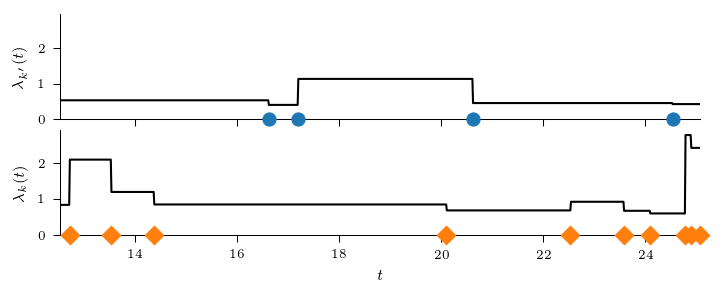

In [16]:
end_time = max(map(max, events))
t_range = np.linspace(start_time, end_time, 1000)

intens_0 = [intensity(0, t, events, mu, alpha, beta) for t in t_range]
intens_1 = [intensity(1, t, events, mu, alpha, beta) for t in t_range]

fig, axs = plt.subplots(2, 1, figsize=(5.5, 1.95), sharex=True, sharey=True)

plt.sca(axs[0])
plt.scatter(events_filtered[0], np.zeros_like(events_filtered[0]), 
            marker='o', s=40, zorder=100, c='C0', clip_on=False)
plt.plot(t_range, intens_0, c='k', ls='-')
plt.ylabel(r"$\lambda_{k'}(t)$")
plt.xlabel(r"$t$")

plt.sca(axs[1])
plt.scatter(events_filtered[1], np.zeros_like(events_filtered[1]), 
            marker='D', s=40, zorder=100, c='C1', clip_on=False)
plt.plot(t_range, intens_1, c='k', ls='-')
plt.ylabel(r"$\lambda_{k}(t)$")
plt.xlabel(r"$t$")

plt.ylim(bottom=-0.001)
plt.xlim(start_time, end_time)

for ax in axs:
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
fig.savefig('fig.pdf')

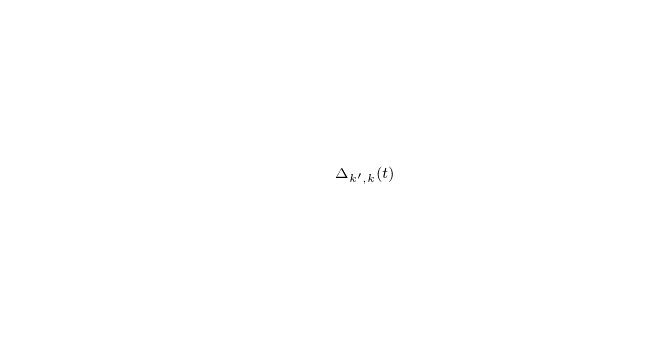

In [6]:
plt.figure()
plt.text(0.5, 0.5, r"$\Delta_{k^\prime,k}(t)$")
plt.axis('off')
plt.savefig('tex.pdf')

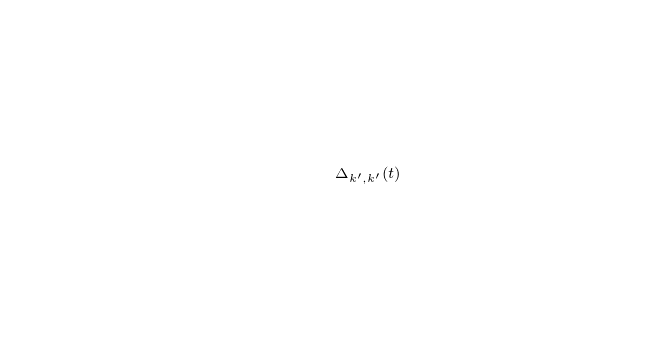

In [5]:
plt.figure()
plt.text(0.5, 0.5, r"$\Delta_{k^\prime,k^\prime}(t)$")
plt.axis('off')
plt.savefig('tex2.pdf')

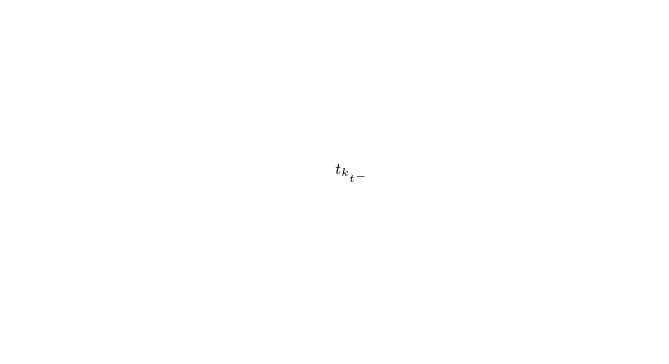

In [14]:
plt.figure()
plt.text(0.5, 0.5, r"$t_{k_{t^-}}$")
#plt.text(0.0, 0.0, r"$\Delta_{k',k'}(t)$")
plt.axis('off')
plt.savefig('tex3.pdf')

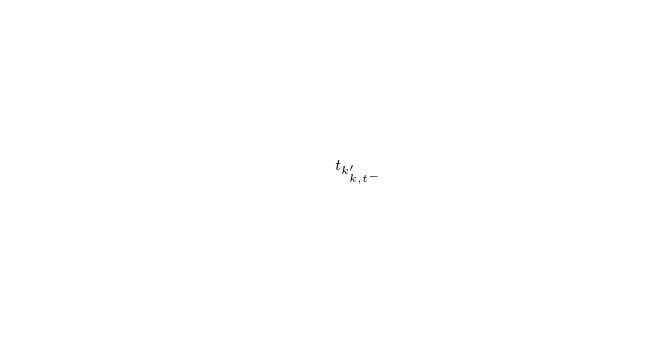

In [13]:
plt.figure()
plt.text(0.5, 0.5, r"$t_{k^{\prime}_{k,t^-}}$")
#plt.text(0.0, 0.0, r"$\Delta_{k',k'}(t)$")
plt.axis('off')
plt.savefig('tex4.pdf')

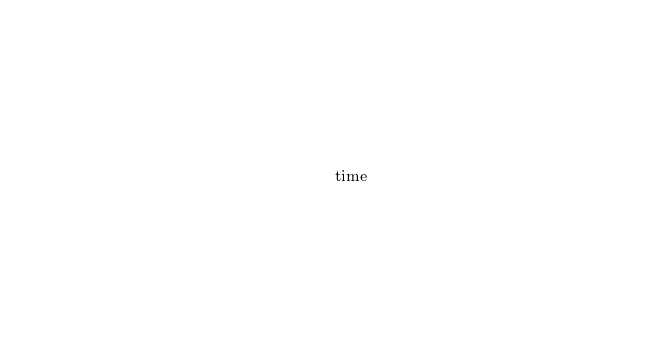

In [11]:
plt.figure()
plt.text(0.5, 0.5, "time")
plt.axis('off')
plt.savefig('tex5.pdf')

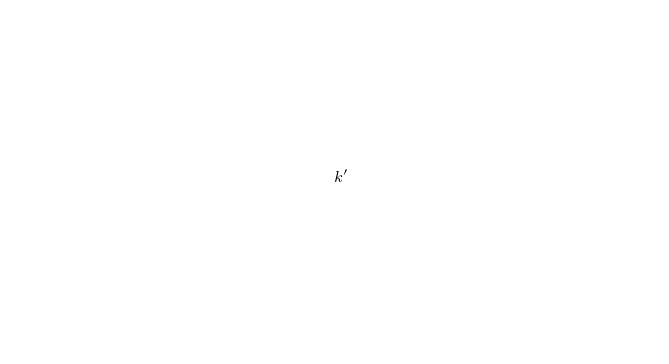

In [4]:
plt.figure()
plt.text(0.5, 0.5, r"$k^\prime$")
plt.axis('off')
plt.savefig('tex6.pdf')

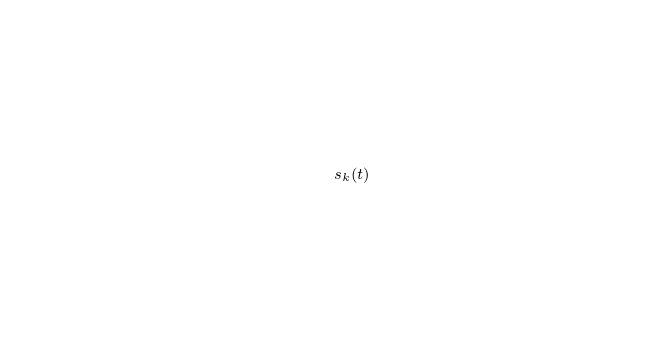

In [9]:
plt.figure()
plt.text(0.5, 0.5, r"$s_k(t)$")
plt.axis('off')
plt.savefig('tex6.pdf')

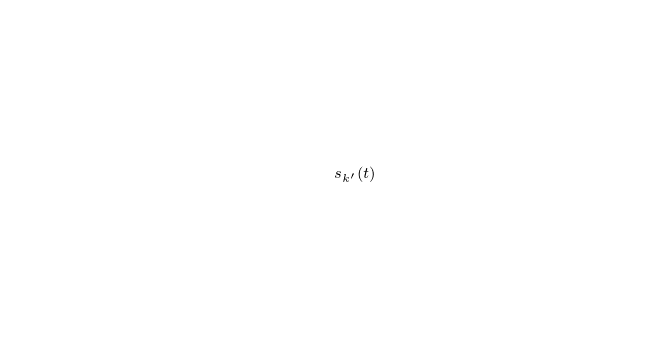

In [14]:
plt.figure()
plt.text(0.5, 0.5, r"$s_{k^\prime}(t)$")
plt.axis('off')
plt.savefig('tex7.pdf')

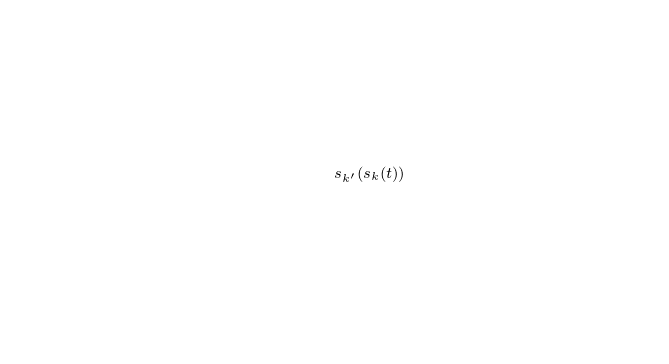

In [15]:
plt.figure()
plt.text(0.5, 0.5, r"$s_{k^\prime}(s_k(t))$")
plt.axis('off')
plt.savefig('tex8.pdf')